In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 500

## Предсказание отклика банковских клиентов на основе данных маркетинговой компании банков

### Loading data

In [2]:
df = pd.read_csv('banking.csv')

### Basic info about data

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<Axes: ylabel='age'>

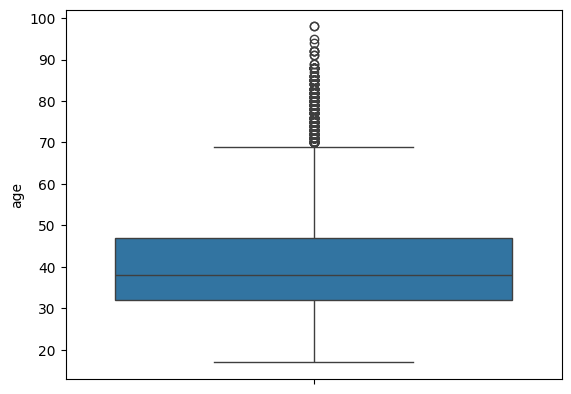

In [7]:
sns.boxplot(df['age'])

### First steps


Missing data

In [8]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


### Numerical data

List

Pearson correlation: basic and using seaborn

Removing highly correlated features


Boxplot of couple numerical columns (`sns.boxplot(y=c, x=df['y'].astype('category'), data=df`))

<Axes: >

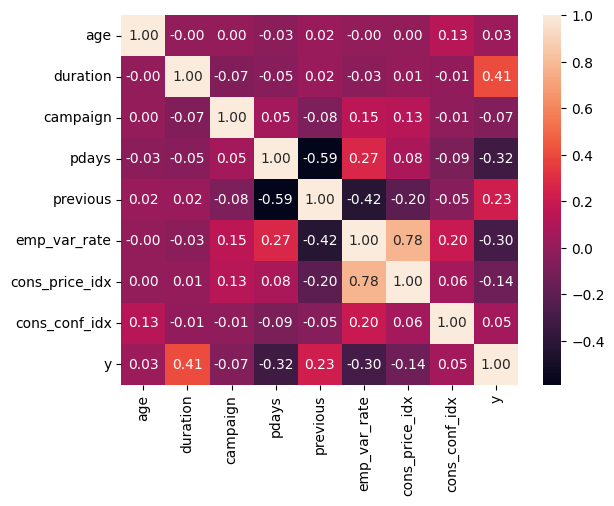

In [13]:
numerical = df.describe().columns
sns.heatmap(df[numerical].corr(), annot=True, fmt='.2f')

In [10]:
df = df.drop(['nr_employed','euribor3m'],axis=1)
numerical = df.describe().columns

In [11]:
numerical

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'y'],
      dtype='object')

In [12]:
df[numerical].describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,1.000000


### Categorical data

Catplot `sns.catplot(x=col, kind='count', col='y', data=df, sharey=False); set_xticklabels(rotation=60)`

Removing invariable features

Encoding remaining features (one-hot encoding / mean-target encoding)

In [14]:
categorical = df.describe(include='object').columns

<Figure size 600x1000 with 0 Axes>

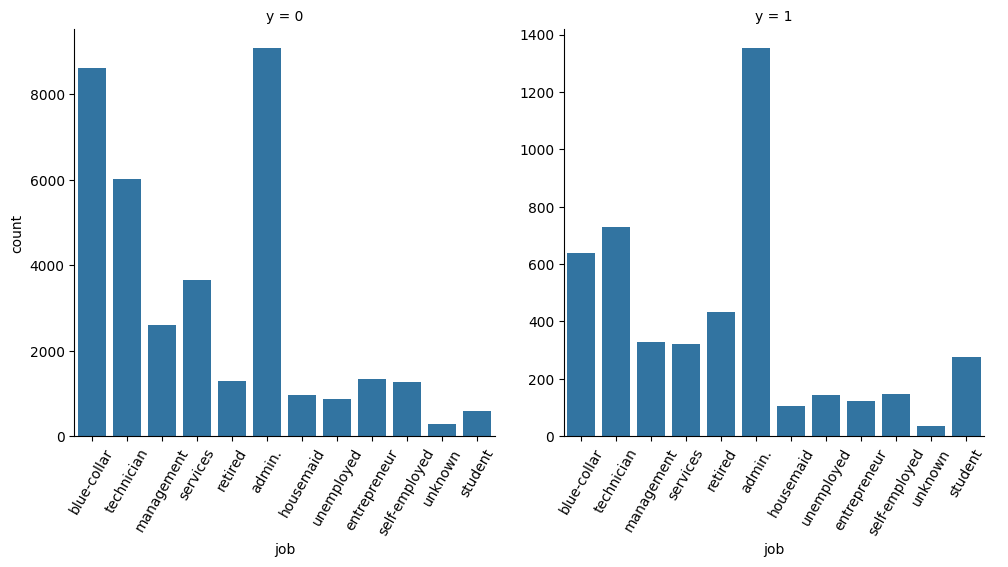

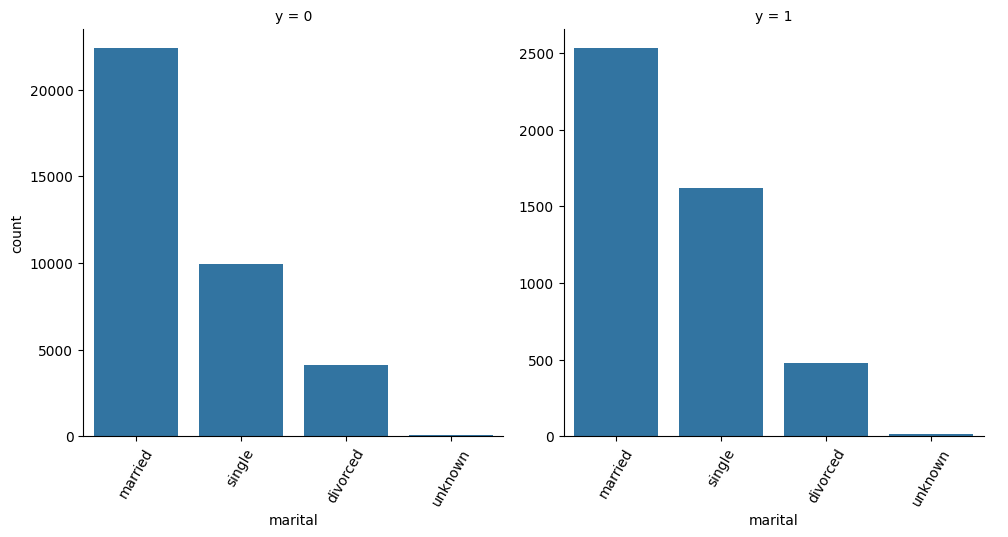

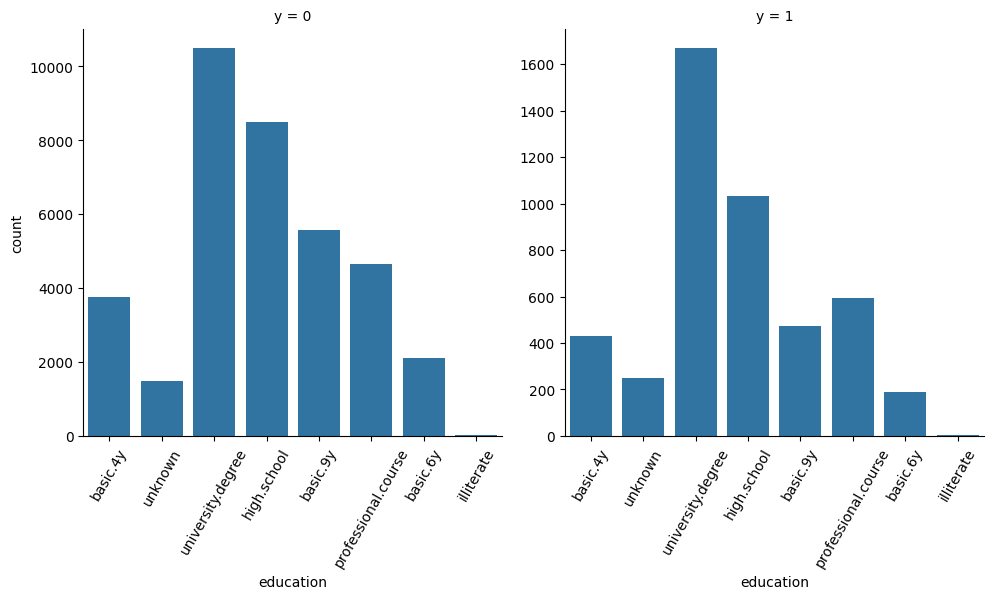

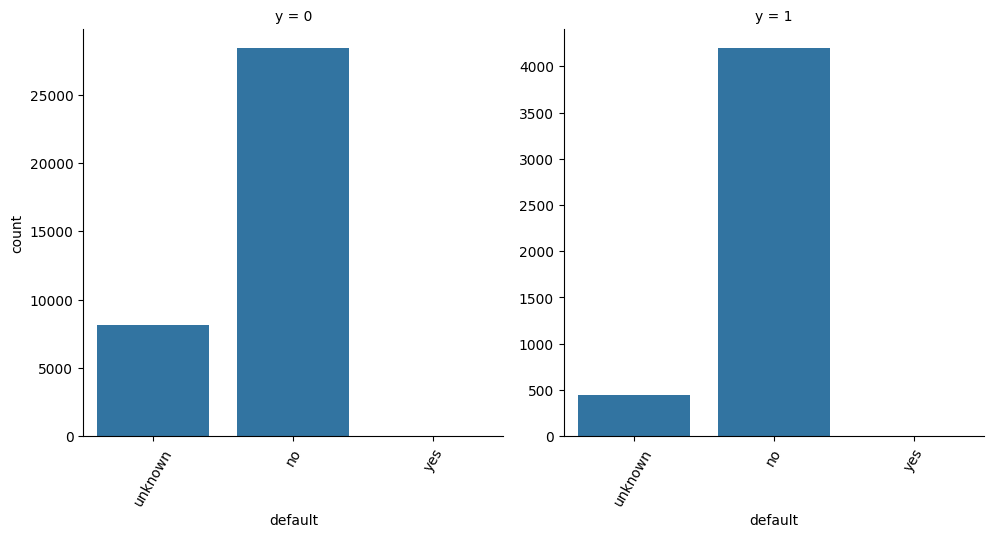

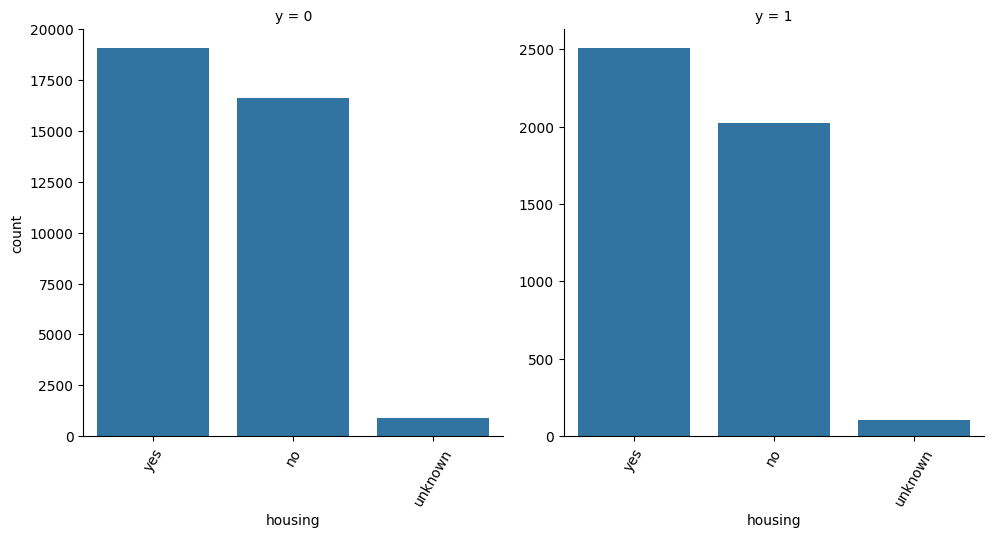

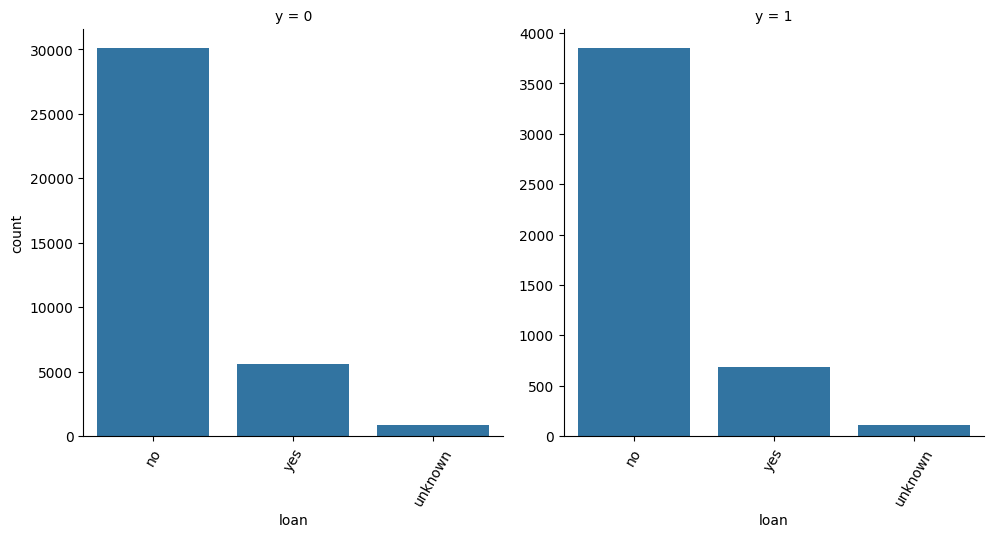

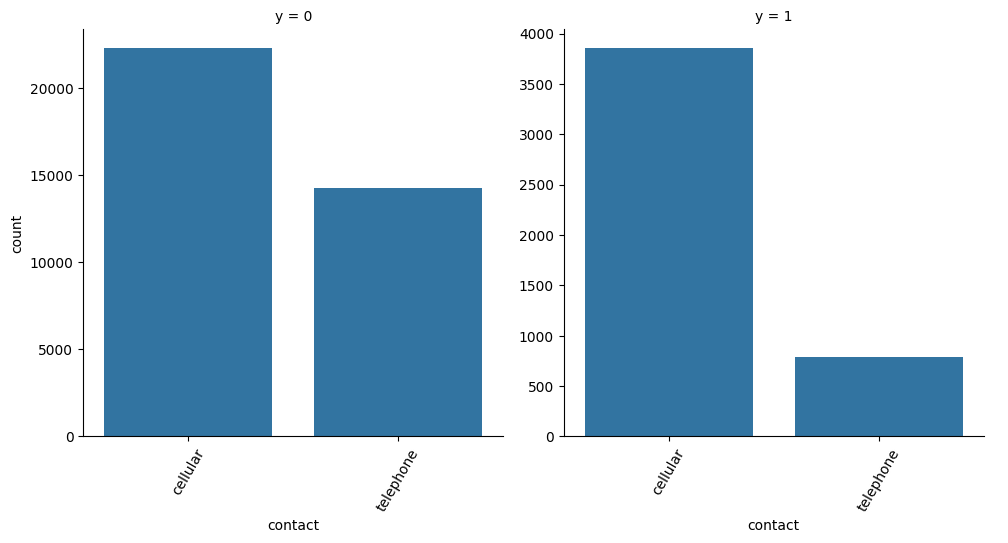

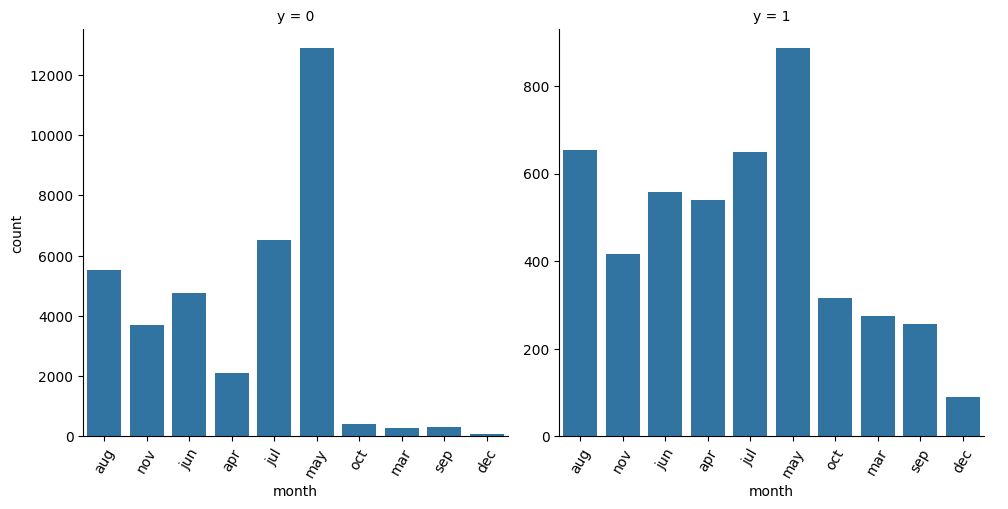

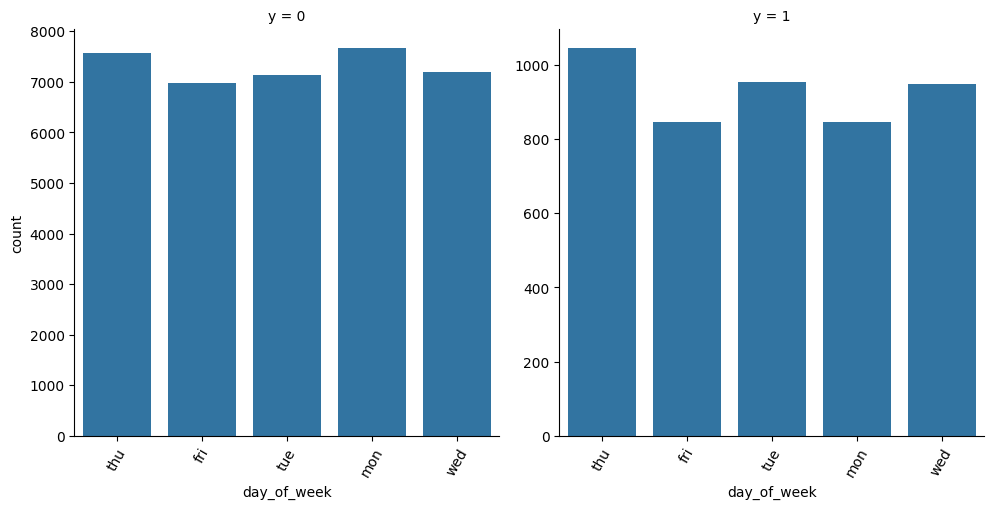

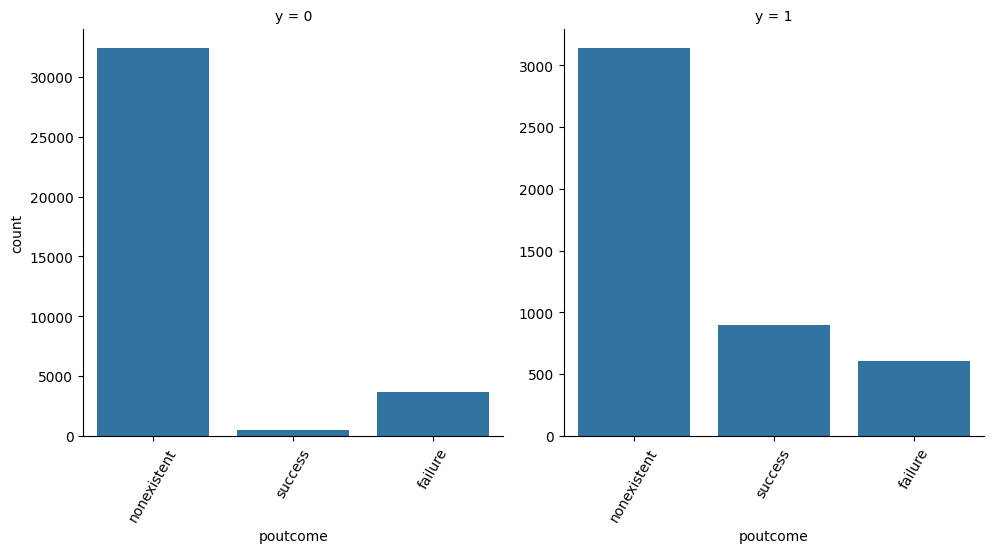

In [15]:
plt.figure(figsize=(6,10))
for col in categorical:
  g = sns.catplot(x=col, kind='count', col='y', data=df, sharey=False)
  g.set_xticklabels(rotation=60)

In [16]:
df = df.drop(['housing','loan','day_of_week'],axis=1)
categorical = df.describe(include='object').columns

In [17]:
df.head()

,age,job,marital,education,default,contact,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,y
0,44,blue-collar,married,basic.4y,unknown,cellular,aug,210,1,999,0,nonexistent,1.4,93.444,-36.1,0
1,53,technician,married,unknown,no,cellular,nov,138,1,999,0,nonexistent,-0.1,93.200,-42.0,0
2,28,management,single,university.degree,no,cellular,jun,339,3,6,2,success,-1.7,94.055,-39.8,1
3,39,services,married,high.school,no,cellular,apr,185,2,999,0,nonexistent,-1.8,93.075,-47.1,0
4,55,retired,married,basic.4y,no,cellular,aug,137,1,3,1,success,-2.9,92.201,-31.4,1


In [18]:
df.describe(include='object')

,job,marital,education,default,contact,month,poutcome
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,2,10,3
top,admin.,married,university.degree,no,cellular,may,nonexistent
freq,10422,24928,12168,32588,26144,13769,35563


In [21]:
pd.get_dummies(df['marital'], dtype=int, drop_first=True)

,married,single,unknown
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
41183,1,0,0
41184,1,0,0
41185,0,1,0
41186,1,0,0


In [22]:
for col in (['marital','default','contact','poutcome']):
  temp = pd.get_dummies(df[col], dtype=int, drop_first=True)
  df = pd.concat((df, temp), axis=1)
  df = df.drop(col, axis=1)

In [23]:
df.head()

,age,job,education,month,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,y,married,single,unknown,unknown,yes,telephone,nonexistent,success
0,44,blue-collar,basic.4y,aug,210,1,999,0,1.4,93.444,-36.1,0,1,0,0,1,0,0,1,0
1,53,technician,unknown,nov,138,1,999,0,-0.1,93.200,-42.0,0,1,0,0,0,0,0,1,0
2,28,management,university.degree,jun,339,3,6,2,-1.7,94.055,-39.8,1,0,1,0,0,0,0,0,1
3,39,services,high.school,apr,185,2,999,0,-1.8,93.075,-47.1,0,1,0,0,0,0,0,1,0
4,55,retired,basic.4y,aug,137,1,3,1,-2.9,92.201,-31.4,1,1,0,0,0,0,0,0,1


In [24]:
df.groupby('job')['y'].mean()

,y
job,
admin.,0.129726
blue-collar,0.068943
entrepreneur,0.085165
housemaid,0.100000
management,0.112175
retired,0.252326
self-employed,0.104856
services,0.081381
student,0.314286


In [25]:
for col in (['job','education','month']):
  means = df.groupby(col)['y'].mean()
  df[col] = df[col].map(means)

In [26]:
df.head()

,age,job,education,month,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,y,married,single,unknown,unknown,yes,telephone,nonexistent,success
0,44,0.068943,0.102490,0.106021,210,1,999,0,1.4,93.444,-36.1,0,1,0,0,1,0,0,1,0
1,53,0.108260,0.145003,0.101439,138,1,999,0,-0.1,93.200,-42.0,0,1,0,0,0,0,0,1,0
2,28,0.112175,0.137245,0.105115,339,3,6,2,-1.7,94.055,-39.8,1,0,1,0,0,0,0,0,1
3,39,0.081381,0.108355,0.204787,185,2,999,0,-1.8,93.075,-47.1,0,1,0,0,0,0,0,1,0
4,55,0.252326,0.102490,0.106021,137,1,3,1,-2.9,92.201,-31.4,1,1,0,0,0,0,0,0,1


### Logistic regression

Classes_, predict_proba, decision_function_

Score on pipeline (pipe.score)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [28]:
X = df.drop('y', axis=1)
Y = df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [49]:
pipe = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('Log',LogisticRegression(class_weight='balanced')) ### class_weight='balanced'
    ]
)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Log', LogisticRegression(class_weight='balanced'))])

In [50]:
predict = pipe.predict(X_test)

In [51]:
pipe.score(X_test, Y_test)

0.863552491016801

In [32]:
pipe.classes_

array([0, 1])

In [33]:
Y_test.head()

,y
11190,0
37619,0
26624,0
24760,0
26798,0


In [34]:
predict[0:5]

array([0, 0, 0, 0, 0])

In [35]:
pipe.predict_proba(X_test[0:5])

array([[0.98487479, 0.01512521],
       [0.96616389, 0.03383611],
       [0.80279713, 0.19720287],
       [0.98275585, 0.01724415],
       [0.60873913, 0.39126087]])

In [36]:
pipe.decision_function(X_test[0:5])

array([-4.17615166, -3.35180482, -1.40386902, -4.04288778, -0.44201529])

### How good we are

Classes imbalance

In [37]:
np.mean(df['y']==0)

0.8873458288821987

In [38]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


### Confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_test, pipe.predict(X_test)).ravel()

print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

True Negative: 7920
False Positive: 1246
False Negative: 159
True Positive: 972


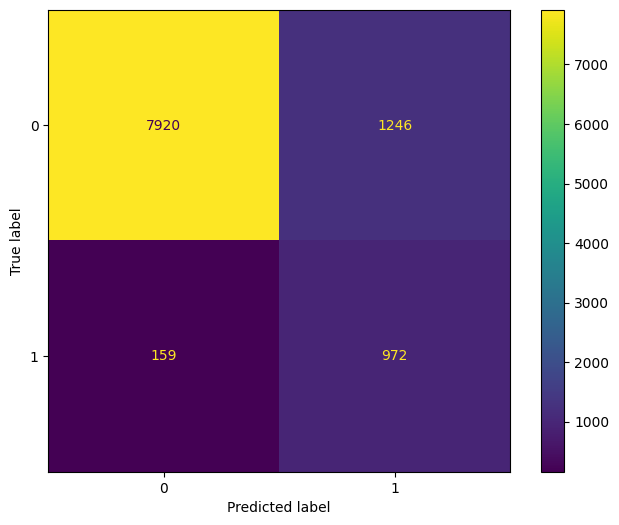

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, pipe.predict(X_test), labels=pipe.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
cmp.plot(ax=ax)
plt.show()

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(f'Accuracy равно: {accuracy_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(Y_test, pipe.predict(X_test)):.3f}' )

Accuracy равно: 0.864
Precision равно: 0.438
Recall равно: 0.859
F-мера равно: 0.580


### ROC/PR и AUC кривые

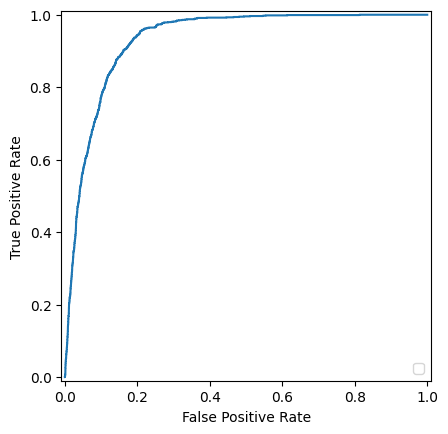

In [54]:
### Получим всевозможные пары FPR, TPR
### И нарисуем ROC-кривую
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, pipe.predict_proba(X_test)[:, 1])
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [55]:
### Посчитаем ROC-AUC
from sklearn.metrics import auc
auc(fpr, tpr)

0.9323443441172379

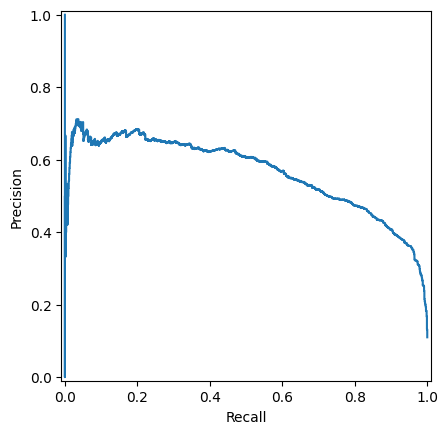

In [57]:
### Получим всевозможные пары Precision, Recall
### И нарисуем PR-кривую
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [58]:
precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

(array([0.10983782, 0.10984848, 0.10985915, ..., 0.5       , 0.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        8.84173298e-04, 0.00000000e+00, 0.00000000e+00]),
 array([0.00282158, 0.00498802, 0.00522068, ..., 1.        , 1.        ,
        1.        ]))

In [59]:
### Посчитаем PR-AUC
auc(recall, precision)

0.5631204229098418

### Изменение порога отсечения для максимизации F-меры

In [60]:
### Найдем threshold, максимизирующий F-меру

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])
f_scores = 2 * precision * recall / (precision + recall)
f_scores = np.where((np.isnan(f_scores)), 0, f_scores)
print("Best F-score: ", np.max(f_scores))
print("Threshold for Best F-score: ", thresholds[np.argmax(f_scores)])
print("Best precision: ", np.max(precision))
print("Threshold for Best precision: ", thresholds[np.argmax(precision)-1])
print("Best recall: ", np.max(recall))
print("Threshold for Best recall: ", thresholds[np.argmax(recall)])

Best F-score:  0.6002041510717931
Threshold for Best F-score:  0.6228382724450424
Best precision:  1.0
Threshold for Best precision:  0.9999999999998792
Best recall:  1.0
Threshold for Best recall:  0.002821579209666294


In [61]:
### Вычислим precision при этом threshold'е
precision[np.argmax(f_scores)]

0.48783185840707965

In [62]:
### Вычислим recall при этом threshold'е
recall[np.argmax(f_scores)]

0.7798408488063661

In [63]:
f_scores = 2 * precision[np.argmax(f_scores)] * recall[np.argmax(f_scores)] / (precision[np.argmax(f_scores)] + recall[np.argmax(f_scores)])

In [64]:
f_scores

0.6002041510717931